In [2]:
from google.colab import files

uploaded = files.upload()

Saving styles.csv to styles (1).csv


In [3]:
import pandas as pd
data = pd.read_csv('styles.csv', on_bad_lines='skip')
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
data.shape

(44424, 10)

In [ ]:
data.describe()

,id,year
count,44424.000000,44423.000000
mean,29696.334301,2012.806497
std,17049.490518,2.126480
min,1163.000000,2007.000000
25%,14768.750000,2011.000000
50%,28618.500000,2012.000000
75%,44683.250000,2015.000000
max,60000.000000,2019.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [ ]:
for column in data.columns:
    print(f"Unique values in column '{column}': {data[column].unique()}")
print(data['articleType'].unique())

Unique values in column 'id': [15970 39386 59263 ... 18842 46694 51623]
Unique values in column 'gender': ['Men' 'Women' 'Boys' 'Girls' 'Unisex']
Unique values in column 'masterCategory': ['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']
Unique values in column 'subCategory': ['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Nails' 'Scarves' 'Dress'
 'Loungewear and Nightwear' 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers'
 'Skin Care' 'Makeup' 'Free Gifts' 'Ties' 'Accessories' 'Skin'
 'Beauty Accessories' 'Water Bottle' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']
Unique values in column 'articleType': ['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops' 'Handbags

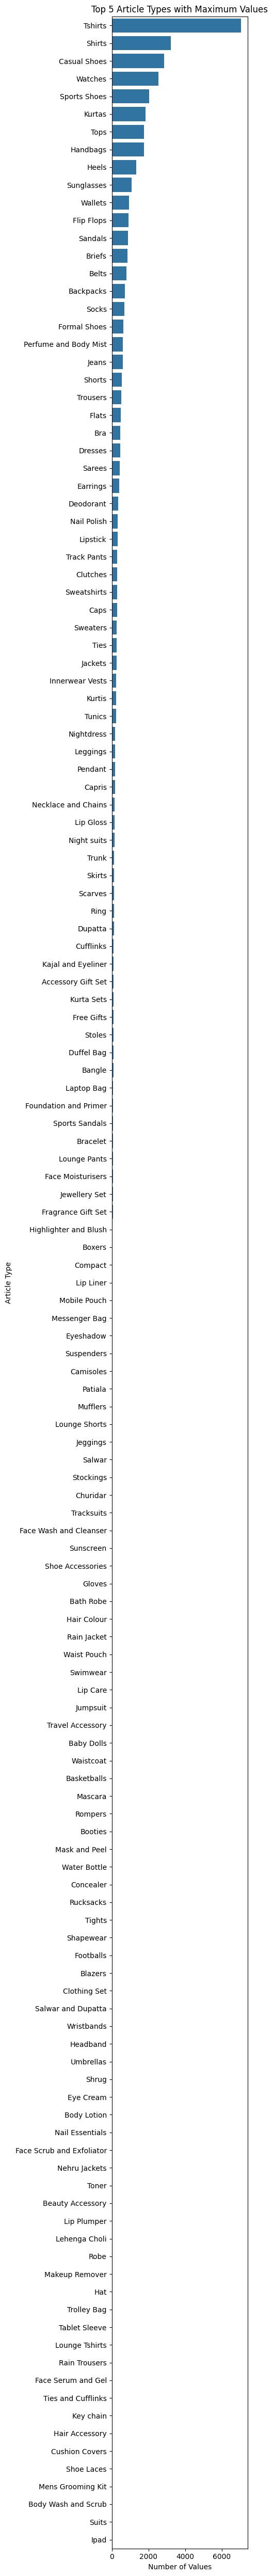

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
article_counts = data['articleType'].value_counts().reset_index()
article_counts.columns = ['articleType', 'count']
top5_articles = article_counts.sort_values(by='count', ascending=False)
plt.figure(figsize=(5, 50))
sns.barplot(y='articleType', x='count', data=top5_articles)
plt.title('Article Types with Maximum Values')
plt.ylabel('Article Type')
plt.xlabel('Number of Values')
plt.tight_layout()
plt.show()

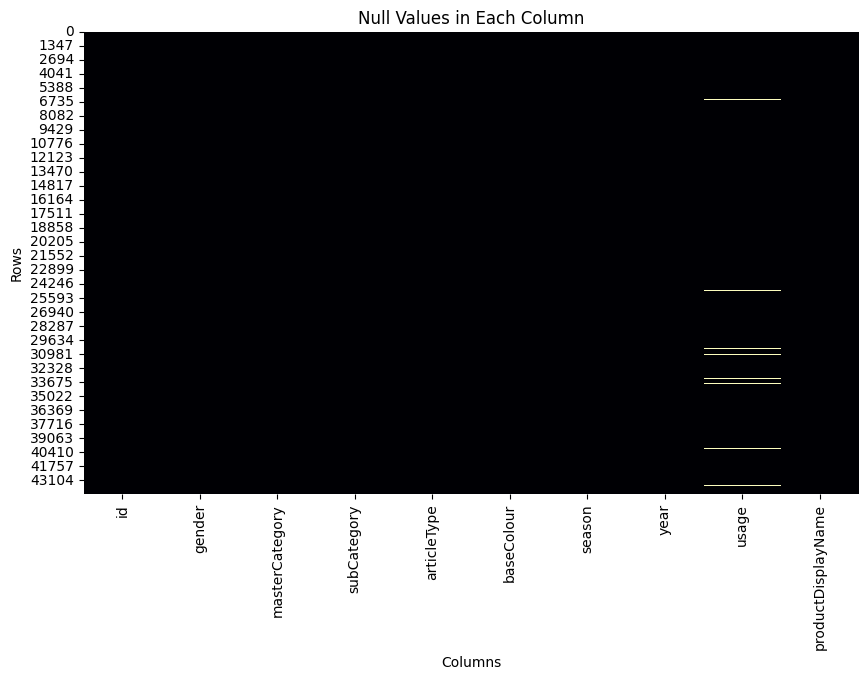

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='magma')
plt.title('Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

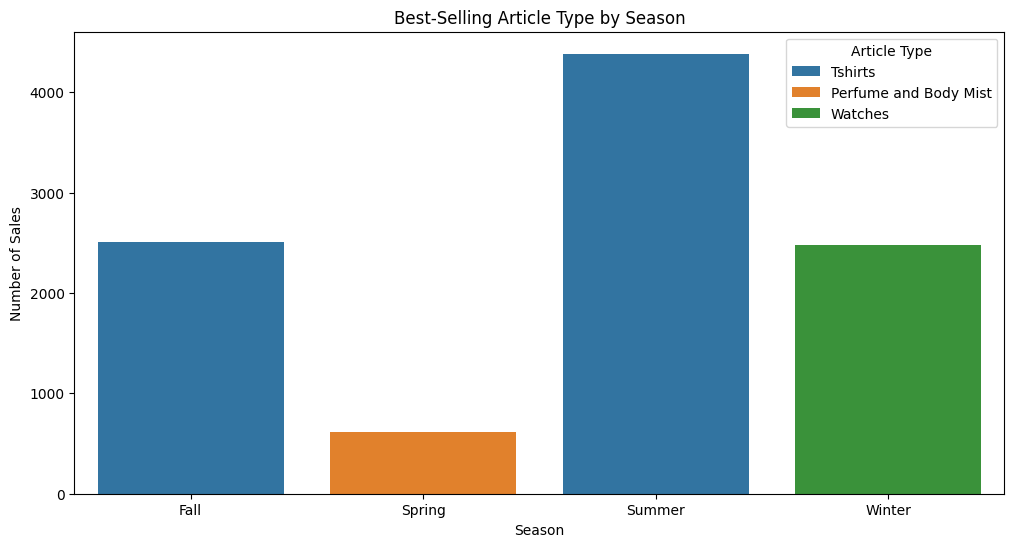

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
season_article_counts = data.groupby(['season', 'articleType'])['articleType'].count().reset_index(name='count')
best_articles_by_season = season_article_counts.loc[season_article_counts.groupby('season')['count'].idxmax()]
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='count', hue='articleType', data=best_articles_by_season)
plt.title('Best-Selling Article Type by Season')
plt.xlabel('Season')
plt.ylabel('Number of Sales')
plt.legend(title='Article Type')
plt.show()

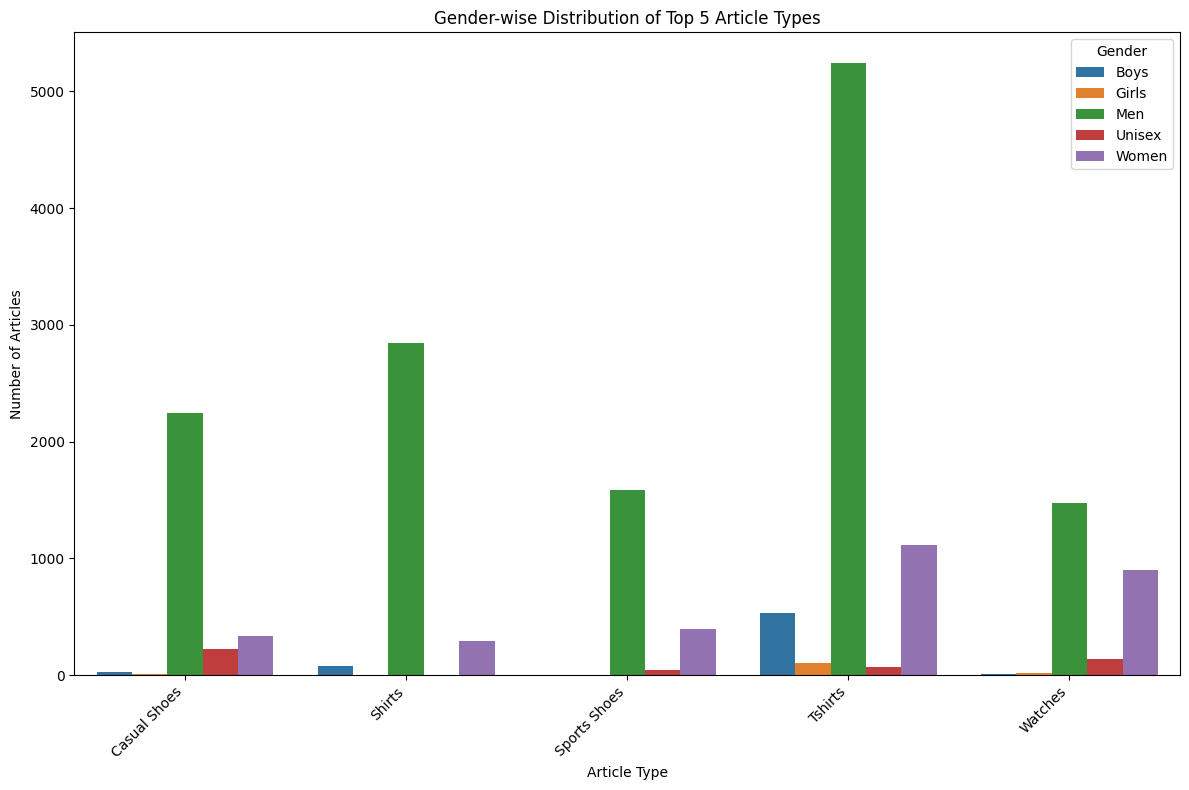

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

top_article_types = data['articleType'].value_counts().head(5).index
filtered_data = data[data['articleType'].isin(top_article_types)]
gender_article_counts = filtered_data.groupby(['gender', 'articleType'])['articleType'].count().reset_index(name='count')
plt.figure(figsize=(12, 8))
sns.barplot(x='articleType', y='count', hue='gender', data=gender_article_counts)
plt.title('Gender-wise Distribution of Top 5 Article Types')
plt.xlabel('Article Type')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

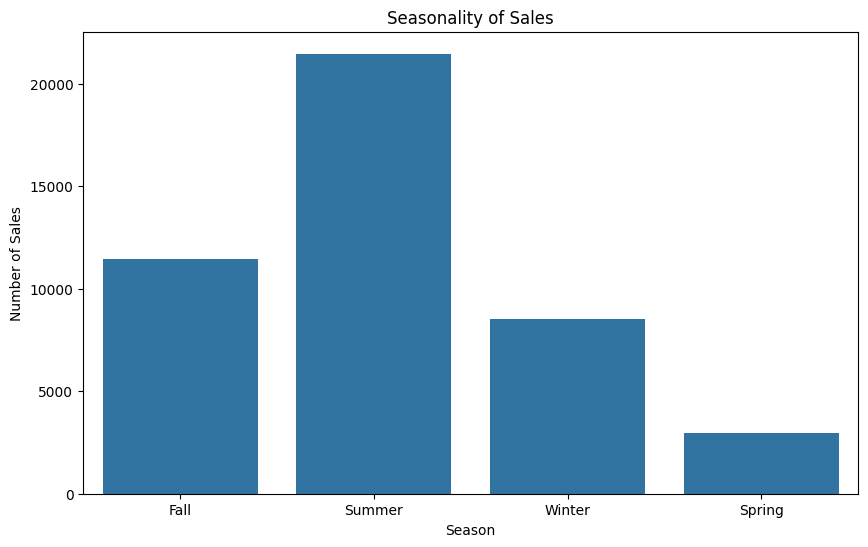

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=data)
plt.title('Seasonality of Sales')
plt.xlabel('Season')
plt.ylabel('Number of Sales')
plt.show()

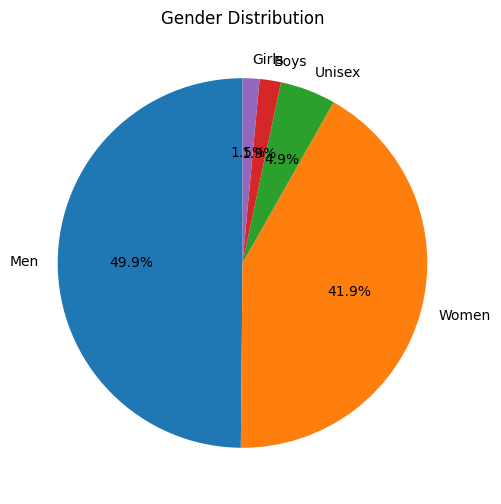

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


gender_counts = data['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


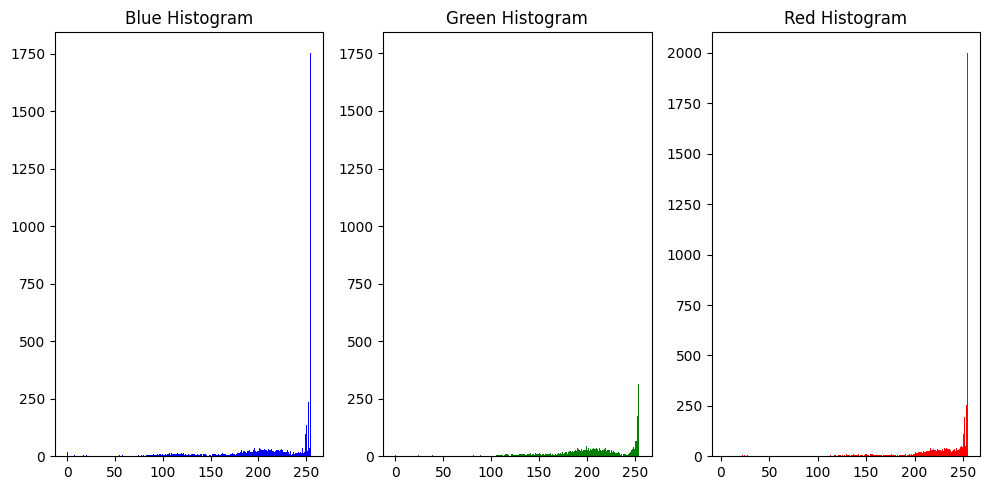

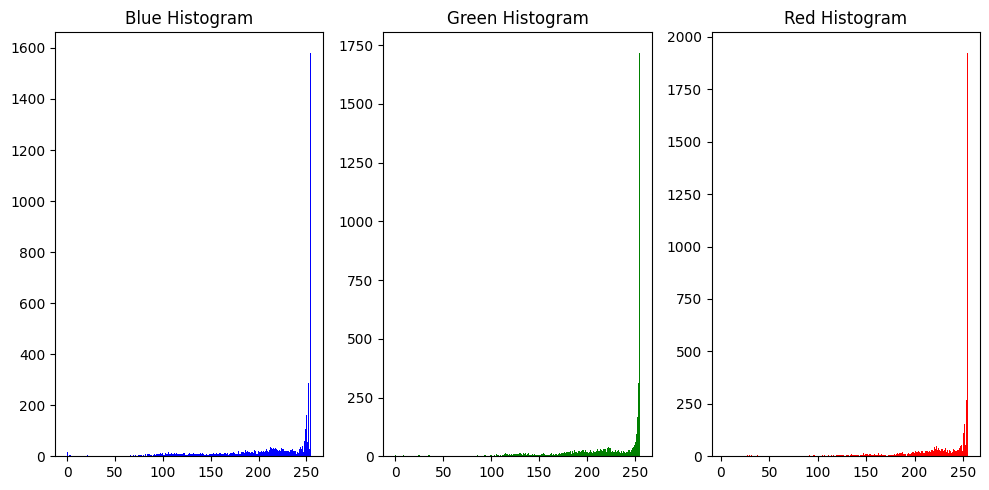

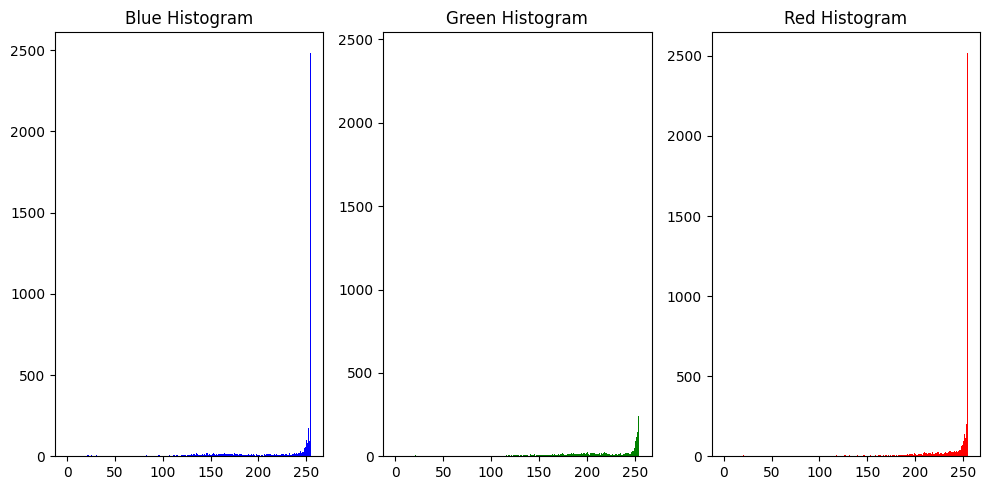

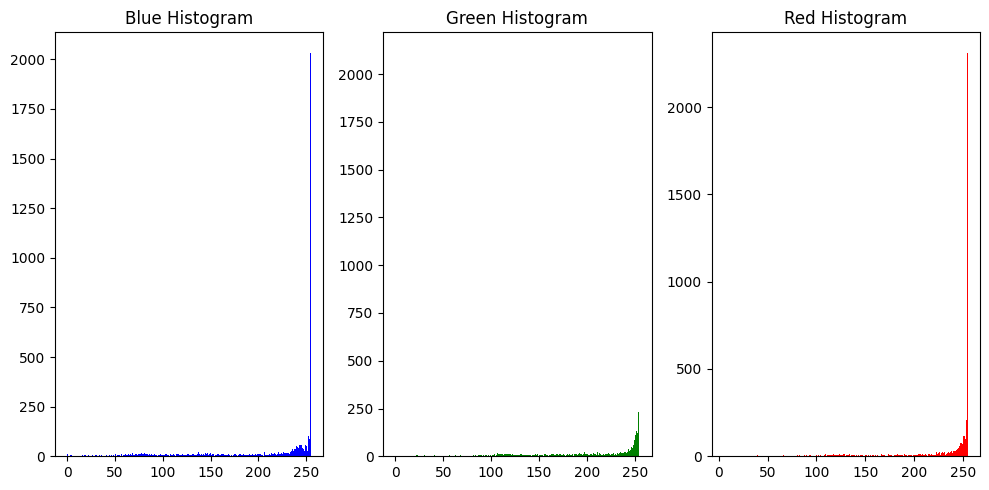

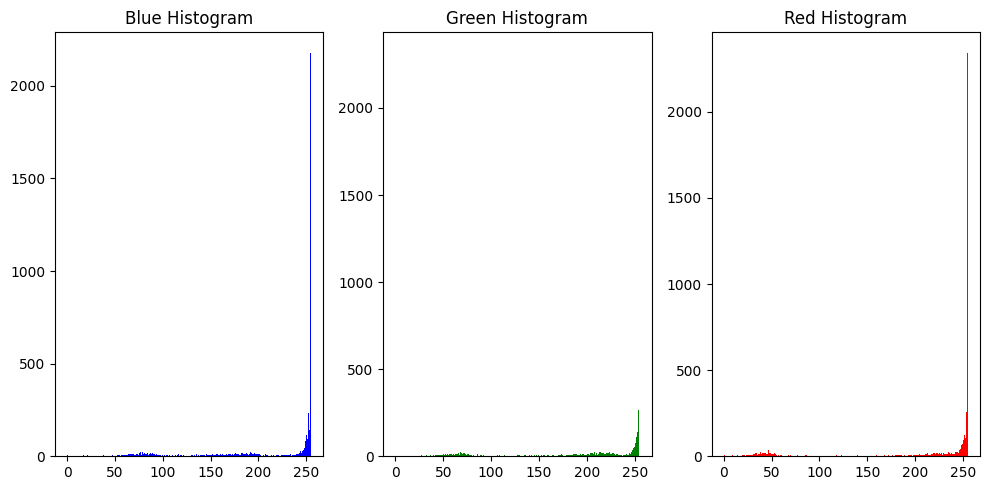

In [5]:
import cv2
import matplotlib.pyplot as plt
import os
from google.colab import drive
drive.mount('/content/drive')

def plot_color_histograms(image_path):
  try:
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    (red, green, blue) = cv2.split(image_rgb)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.hist(blue.ravel(), bins=256, color='blue')
    plt.title("Blue Histogram")

    plt.subplot(1, 3, 2)
    plt.hist(green.ravel(), bins=256, color='green')
    plt.title("Green Histogram")

    plt.subplot(1, 3, 3)
    plt.hist(red.ravel(), bins=256, color='red')
    plt.title("Red Histogram")

    plt.tight_layout()
    plt.show()

  except Exception as e:
    print(f"Error processing image {image_path}: {e}")


images_path = "/content/drive/My Drive/images"
image_files = [f for f in os.listdir(images_path) if os.path.isfile(os.path.join(images_path, f))][:5]
for image_file in image_files:
    image_path = os.path.join(images_path, image_file)
    plot_color_histograms(image_path)

In [ ]:
import pandas as pd


csv_file_path = '/content/drive/MyDrive/styles.csv'
image_path='/content/drive/MyDrive/images/'


df = pd.read_csv(csv_file_path, on_bad_lines='skip')
df['image_path'] = df['id'].astype(str) + '.jpg'
output_csv_path = '/content/updated_styles.csv'
df.to_csv(output_csv_path, index=False)

print(f"Updated CSV saved to: {output_csv_path}")

Updated CSV saved to: /content/updated_styles.csv


In [ ]:
import pandas as pd

csv_file_path = '/content/updated_styles.csv'
df = pd.read_csv(csv_file_path, on_bad_lines='skip')
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image_path
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg


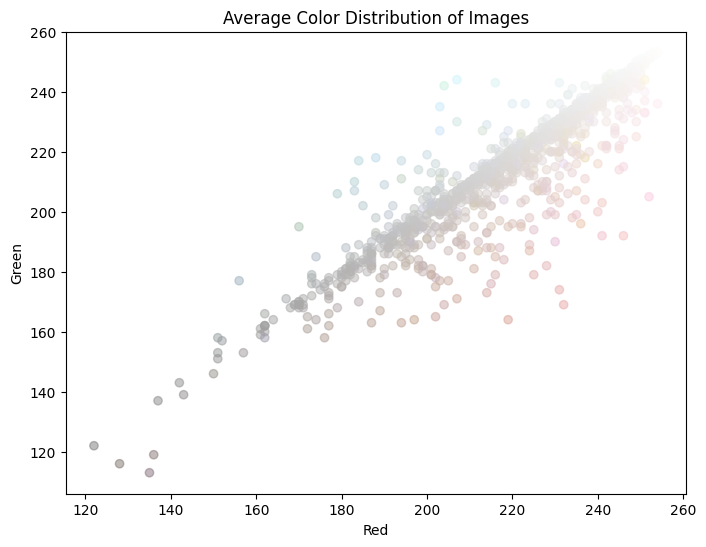

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

df = pd.read_csv('updated_styles.csv', on_bad_lines='skip')
df_subset = df.head(1000)
path = '/content/drive/MyDrive/images'
def get_average_rgb(img_path):
    try:
        img = Image.open(img_path).convert('RGB')
        img_array = np.array(img)
        average_color = tuple(map(int, np.mean(img_array, axis=(0, 1))))
        return average_color
    except Exception as e:
        print(f"Error processing image {img_path}: {e}")
        return (0, 0, 0)


average_rgbs = []
for img_name in df_subset['image_path']:
    img_path_full = os.path.join(path, img_name)
    if os.path.exists(img_path_full):
        average_rgb = get_average_rgb(img_path_full)
        average_rgbs.append(average_rgb)


average_rgbs = np.array(average_rgbs)
plt.figure(figsize=(8, 6))
plt.scatter(average_rgbs[:, 0], average_rgbs[:, 1], c=average_rgbs / 255.0, alpha=0.5)
plt.title('Average Color Distribution of Images')
plt.xlabel('Red')
plt.ylabel('Green')
plt.show()




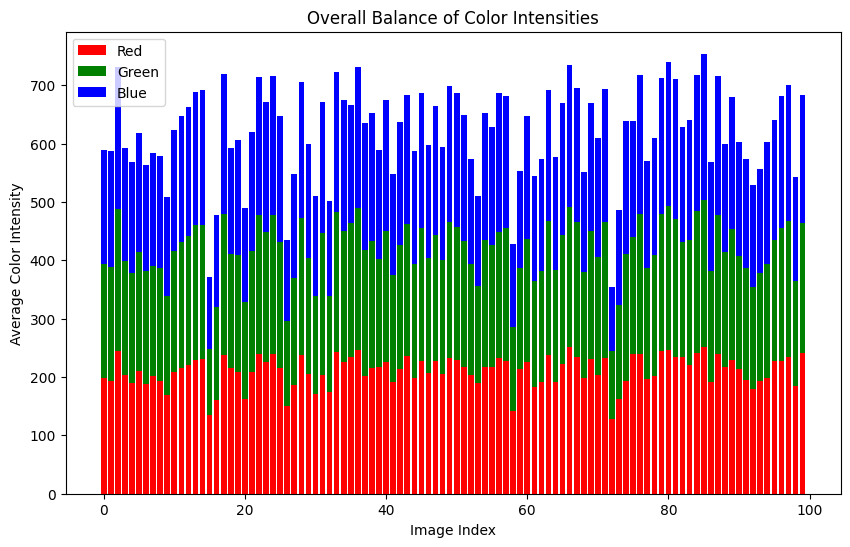

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

df = pd.read_csv('updated_styles.csv', on_bad_lines='skip')
df_subset = df.head(100)
path = '/content/drive/MyDrive/images'

def get_average_rgb(img_path):
    try:
        img = Image.open(img_path).convert('RGB')
        img_array = np.array(img)
        average_color = tuple(map(int, np.mean(img_array, axis=(0, 1))))
        return average_color
    except Exception as e:
        print(f"Error processing image {img_path}: {e}")
        return (0, 0, 0)


average_rgbs = []
for img_name in df_subset['image_path']:
    img_path_full = os.path.join(path, img_name)
    if os.path.exists(img_path_full):
        average_rgb = get_average_rgb(img_path_full)
        average_rgbs.append(average_rgb)

average_rgbs = np.array(average_rgbs)
red_values = average_rgbs[:, 0]
green_values = average_rgbs[:, 1]
blue_values = average_rgbs[:, 2]

plt.figure(figsize=(10, 6))
plt.bar(range(len(red_values)), red_values, color='red', label='Red')
plt.bar(range(len(green_values)), green_values, bottom=red_values, color='green', label='Green')
plt.bar(range(len(blue_values)), blue_values, bottom=red_values + green_values, color='blue', label='Blue')

plt.title('Overall Balance of Color Intensities')
plt.xlabel('Image Index')
plt.ylabel('Average Color Intensity')
plt.legend()
plt.show()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━

<ipython-input-23-5410ede050d4>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['embeddings'] = embeddings


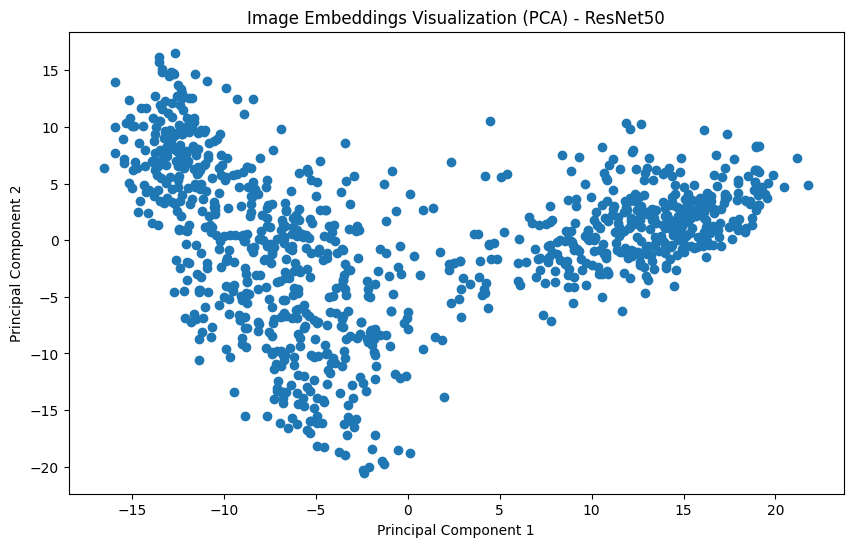

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
import os
import ast

df = pd.read_csv('updated_styles.csv', on_bad_lines='skip')
df_subset = df.head(1000)
img_width, img_height = 224, 224
path = '/content/drive/MyDrive/images'
embeddings_file_path = 'updated_styles_with_embeddings_resnet50_1000.csv'
if os.path.exists(embeddings_file_path):
    df_with_embeddings = pd.read_csv(embeddings_file_path)
    df_with_embeddings['embeddings'] = df_with_embeddings['embeddings'].apply(ast.literal_eval)
    embeddings = np.array(df_with_embeddings['embeddings'].tolist())
else:
    base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
    model = Model(inputs=base_model.input, outputs=base_model.output)


    def load_and_preprocess_image(img_path):
        img = image.load_img(img_path, target_size=(img_width, img_height))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        return x


    embeddings = []
    for img_name in df_subset['image_path']:
        img_path_full = os.path.join(path, img_name)
        if os.path.exists(img_path_full):
            img = load_and_preprocess_image(img_path_full)
            embedding = model.predict(img)
            embeddings.append(embedding.flatten().tolist())
        else:
            print(f"Image not found: {img_path_full}")
            embeddings.append([np.nan] * 2048)

    df_subset['embeddings'] = embeddings
    df_subset.to_csv(embeddings_file_path, index=False)
    embeddings = np.array(df_subset['embeddings'].tolist())



pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
plt.figure(figsize=(10, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
plt.title('Image Embeddings Visualization (PCA) - ResNet50')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
df_with_embeddings = pd.read_csv('updated_styles_with_embeddings_resnet50_1000.csv')
df_with_embeddings['embeddings'] = df_with_embeddings['embeddings'].apply(ast.literal_eval)


for index, row in df_with_embeddings.head(5).iterrows():
    print(f"Embeddings for image {row['id']}:")
    print(row['embeddings'])
    print("\n")

Embeddings for image 15970:
[0.1879463642835617, 1.2093291282653809, 0.0, 0.029653819277882576, 0.2974417507648468, 0.26833054423332214, 0.9670575261116028, 0.863819420337677, 0.02478116936981678, 0.0, 0.2008609026670456, 0.0, 0.007870335131883621, 0.21332086622714996, 0.0, 4.222072601318359, 0.007469777949154377, 0.4481319487094879, 0.3452281653881073, 0.02449161373078823, 0.5280258655548096, 0.5544306039810181, 0.056761205196380615, 0.39379385113716125, 0.02510583959519863, 0.15566754341125488, 0.0, 0.37757331132888794, 0.06890367716550827, 0.4488908350467682, 0.12803028523921967, 0.05258370563387871, 2.1736204624176025, 1.123470425605774, 0.5160731673240662, 0.3847646415233612, 0.1183881163597107, 0.5192561149597168, 0.0403621681034565, 0.9037550091743469, 0.0, 0.01802940107882023, 0.09758112579584122, 0.1347501277923584, 0.3127132058143616, 0.5577446222305298, 1.2779265642166138, 1.708898901939392, 0.7028117179870605, 1.3478307723999023, 0.006360698491334915, 0.3168388903141022, 0.


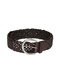

Product ID: 48124, Similarity Score: 0.9087



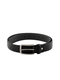

Product ID: 18839, Similarity Score: 0.8566



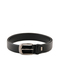

Product ID: 15941, Similarity Score: 0.8554



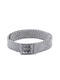

Product ID: 17072, Similarity Score: 0.8502



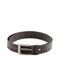

Product ID: 18801, Similarity Score: 0.8477


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import ast
from IPython.display import display, HTML
import base64
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
import os


df_with_embeddings = pd.read_csv('updated_styles_with_embeddings_resnet50_1000.csv')
df_with_embeddings['embeddings'] = df_with_embeddings['embeddings'].apply(ast.literal_eval)
embeddings = np.array(df_with_embeddings['embeddings'].tolist())
df_original = pd.read_csv('updated_styles.csv', on_bad_lines='skip')


def recommend_products_by_id(product_id, top_k=5):
    query_index = df_with_embeddings[df_with_embeddings['id'] == product_id].index[0]
    query_embedding = embeddings[query_index].reshape(1, -1)
    similarities = cosine_similarity(query_embedding, embeddings)
    most_similar_indices = np.argsort(similarities[0])[::-1][1:top_k + 1]
    recommended_products = []
    for index in most_similar_indices:
        product_id = df_with_embeddings.iloc[index]['id']
        similarity_score = similarities[0][index]
        recommended_products.append((product_id, similarity_score))

    return recommended_products


def display_recommended_products(recommendations, df_with_embeddings, df_original):

    for product_id, similarity_score in recommendations:
        image_path = df_original[df_original['id'] == product_id]['image_path'].values[0]
        full_image_path = '/content/drive/MyDrive/images/' + image_path

        try:
            with open(full_image_path, "rb") as image_file:
                encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
            display(HTML(f'<img src="data:image/jpeg;base64,{encoded_string}" width="200" height="200">'))
            print(f"Product ID: {product_id}, Similarity Score: {similarity_score:.4f}")

        except Exception as e:
            print(f"Error displaying image for product ID: {product_id}. Error: {e}")



input_product_id = 48123
recommendations = recommend_products_by_id(input_product_id)
display_recommended_products(recommendations, df_with_embeddings, df_original)

32/32 ━━━━━━━━━━━━━━━━━━━━ 667s 21s/step


<ipython-input-36-95dcbed2f181>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['embeddings'] = embeddings.tolist()



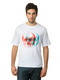

Product ID: 43500, Similarity Score: 0.9376



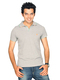

Product ID: 6079, Similarity Score: 0.9234



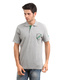

Product ID: 58726, Similarity Score: 0.9123



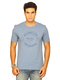

Product ID: 5095, Similarity Score: 0.9062



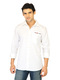

Product ID: 14052, Similarity Score: 0.9013


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import ast
from IPython.display import display, HTML
import base64
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import os


df = pd.read_csv('updated_styles.csv', on_bad_lines='skip')
df_subset = df.head(1000)

img_width, img_height = 224, 224
path = '/content/drive/MyDrive/images'

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

images = []
for img_name in df_subset['image_path']:
    img_path_full = os.path.join(path, img_name)
    if os.path.exists(img_path_full):
        img = load_and_preprocess_image(img_path_full)
        images.append(img)
    else:
        print(f"Image not found: {img_path_full}")
        images.append(np.zeros((1, img_width, img_height, 3)))

images = np.vstack(images)



base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer='adam', loss='mse')
embeddings = model.predict(images)
df_subset['embeddings'] = embeddings.tolist()
df_subset.to_csv('updated_styles_with_embeddings_vgg16_1000_trained.csv', index=False)

def recommend_products_by_id(product_id, top_k=5):
    query_index = df_with_embeddings[df_with_embeddings['id'] == product_id].index[0]
    query_embedding = embeddings[query_index].reshape(1, -1)
    similarities = cosine_similarity(query_embedding, embeddings)
    most_similar_indices = np.argsort(similarities[0])[::-1][1:top_k + 1]
    recommended_products = []
    for index in most_similar_indices:
        product_id = df_with_embeddings.iloc[index]['id']
        similarity_score = similarities[0][index]
        recommended_products.append((product_id, similarity_score))

    return recommended_products

def display_recommended_products(recommendations, df_with_embeddings, df_original):

    for product_id, similarity_score in recommendations:
        image_path = df_original[df_original['id'] == product_id]['image_path'].values[0]
        full_image_path = '/content/drive/MyDrive/images/' + image_path

        try:
            with open(full_image_path, "rb") as image_file:
                encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
            display(HTML(f'<img src="data:image/jpeg;base64,{encoded_string}" width="200" height="200">'))
            print(f"Product ID: {product_id}, Similarity Score: {similarity_score:.4f}")

        except Exception as e:
            print(f"Error displaying image for product ID: {product_id}. Error: {e}")

input_product_id = 1855
recommendations = recommend_products_by_id(input_product_id)
display_recommended_products(recommendations, df_subset, df)


32/32 ━━━━━━━━━━━━━━━━━━━━ 208s 6s/step


<ipython-input-37-81a709636431>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['embeddings'] = embeddings.tolist()



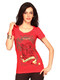

Product ID: 3953, Similarity Score: 0.8358



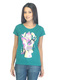

Product ID: 26951, Similarity Score: 0.8221



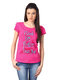

Product ID: 40382, Similarity Score: 0.8137



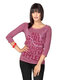

Product ID: 7700, Similarity Score: 0.8106



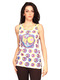

Product ID: 3965, Similarity Score: 0.8037


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import ast
from IPython.display import display, HTML
import base64
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
import os


df = pd.read_csv('updated_styles.csv', on_bad_lines='skip')
df_subset = df.head(1000)

img_width, img_height = 224, 224
path = '/content/drive/MyDrive/images'y

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

images = []
for img_name in df_subset['image_path']:
    img_path_full = os.path.join(path, img_name)
    if os.path.exists(img_path_full):
        img = load_and_preprocess_image(img_path_full)
        images.append(img)
    else:
        print(f"Image not found: {img_path_full}")
        images.append(np.zeros((1, img_width, img_height, 3)))

images = np.vstack(images)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
model = Model(inputs=base_model.input, outputs=x)
embeddings = model.predict(images)
df_subset['embeddings'] = embeddings.tolist()

def display_recommended_products(recommendations, df_with_embeddings, df_original):

    for product_id, similarity_score in recommendations:
        image_path = df_original[df_original['id'] == product_id]['image_path'].values[0]
        full_image_path = '/content/drive/MyDrive/images/' + image_path

        try:
            with open(full_image_path, "rb") as image_file:
                encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
            display(HTML(f'<img src="data:image/jpeg;base64,{encoded_string}" width="200" height="200">'))
            print(f"Product ID: {product_id}, Similarity Score: {similarity_score:.4f}")

        except Exception as e:
            print(f"Error displaying image for product ID: {product_id}. Error: {e}")


input_product_id = 3954
recommendations = recommend_products_by_id(input_product_id)
display_recommended_products(recommendations, df_subset, df)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step


<ipython-input-48-90ca3d66f9ac>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['embeddings'] = embeddings.tolist()



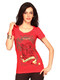

Product ID: 3953, Similarity Score: 0.8502



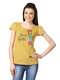

Product ID: 40376, Similarity Score: 0.8228



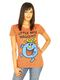

Product ID: 9832, Similarity Score: 0.8182



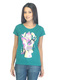

Product ID: 26951, Similarity Score: 0.8166



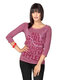

Product ID: 7700, Similarity Score: 0.8113


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import ast
from IPython.display import display, HTML
import base64
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.models import Model
import os

# Load the dataset
df = pd.read_csv('updated_styles.csv', on_bad_lines='skip')
df_subset = df.head(1000)

# Image preprocessing parameters
img_width, img_height = 224, 224
path = '/content/drive/MyDrive/images'

# Function to load and preprocess images
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess images
images = []
for img_name in df_subset['image_path']:
    img_path_full = os.path.join(path, img_name)
    if os.path.exists(img_path_full):
        img = load_and_preprocess_image(img_path_full)
        images.append(img)
    else:
        print(f"Image not found: {img_path_full}")
        images.append(np.zeros((1, img_width, img_height, 3)))

images = np.vstack(images)

# Load MobileNet model and extract features
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Add Global Average Pooling layer
model = Model(inputs=base_model.input, outputs=x)  # Create a new model
embeddings = model.predict(images)  # Extract embeddings

# Add embeddings to the dataframe
df_subset['embeddings'] = embeddings.tolist()

def display_recommended_products(recommendations, df_with_embeddings, df_original):

    for product_id, similarity_score in recommendations:
        image_path = df_original[df_original['id'] == product_id]['image_path'].values[0]
        full_image_path = '/content/drive/MyDrive/images/' + image_path

        try:
            with open(full_image_path, "rb") as image_file:
                encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
            display(HTML(f'<img src="data:image/jpeg;base64,{encoded_string}" width="200" height="200">'))
            print(f"Product ID: {product_id}, Similarity Score: {similarity_score:.4f}")

        except Exception as e:
            print(f"Error displaying image for product ID: {product_id}. Error: {e}")



# Example usage
input_product_id = 3954
recommendations = recommend_products_by_id(input_product_id)
display_recommended_products(recommendations, df_subset, df)

32/32 ━━━━━━━━━━━━━━━━━━━━ 195s 6s/step


<ipython-input-50-50fba900fb3b>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['embeddings'] = embeddings.tolist()



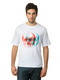

Product ID: 43500, Similarity Score: 0.9195



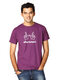

Product ID: 7352, Similarity Score: 0.9180



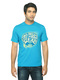

Product ID: 31581, Similarity Score: 0.9134



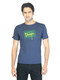

Product ID: 29548, Similarity Score: 0.9128



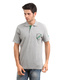

Product ID: 58726, Similarity Score: 0.9078


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import ast
from IPython.display import display, HTML
import base64
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input  # Import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
import os

# Load the dataset
df = pd.read_csv('updated_styles.csv', on_bad_lines='skip')
df_subset = df.head(1000)

# Image preprocessing parameters
img_width, img_height = 224, 224
path = '/content/drive/MyDrive/images'

# Function to load and preprocess images
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess images
images = []
for img_name in df_subset['image_path']:
    img_path_full = os.path.join(path, img_name)
    if os.path.exists(img_path_full):
        img = load_and_preprocess_image(img_path_full)
        images.append(img)
    else:
        print(f"Image not found: {img_path_full}")
        images.append(np.zeros((1, img_width, img_height, 3)))

images = np.vstack(images)

# Load DenseNet121 model and extract features
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Add Global Average Pooling layer
model = Model(inputs=base_model.input, outputs=x)  # Create a new model
embeddings = model.predict(images)  # Extract embeddings

# Add embeddings to the dataframe
df_subset['embeddings'] = embeddings.tolist()

def recommend_products_by_id(product_id, top_k=5):
    query_index = df_with_embeddings[df_with_embeddings['id'] == product_id].index[0]
    query_embedding = embeddings[query_index].reshape(1, -1)
    similarities = cosine_similarity(query_embedding, embeddings)
    most_similar_indices = np.argsort(similarities[0])[::-1][1:top_k + 1]
    recommended_products = []
    for index in most_similar_indices:
        product_id = df_with_embeddings.iloc[index]['id']
        similarity_score = similarities[0][index]
        recommended_products.append((product_id, similarity_score))

    return recommended_products

def display_recommended_products(recommendations, df_with_embeddings, df_original):

    for product_id, similarity_score in recommendations:
        image_path = df_original[df_original['id'] == product_id]['image_path'].values[0]
        full_image_path = '/content/drive/MyDrive/images/' + image_path

        try:
            with open(full_image_path, "rb") as image_file:
                encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
            display(HTML(f'<img src="data:image/jpeg;base64,{encoded_string}" width="200" height="200">'))
            print(f"Product ID: {product_id}, Similarity Score: {similarity_score:.4f}")

        except Exception as e:
            print(f"Error displaying image for product ID: {product_id}. Error: {e}")




input_product_id = 1855
recommendations = recommend_products_by_id(input_product_id)
display_recommended_products(recommendations, df_subset, df)